# Notebook 4 - Data preparation, model training and evaluation



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We're going to use the data from exercise 2, which has already been cleaned up. We'll put them in a dataframe and display the first 5 rows and the last 5.

In [20]:

df = pd.read_csv('prepared_data.csv')
df

weekday  daytime     isHoliday  distance  count startClusterName  \
0           Di        7  Keine Ferien         3     15        Hunedoara   
1           Mi       17  Keine Ferien         0     10            Turda   
2           Sa       11  Keine Ferien         3     10            Turda   
3           Fr       13  Keine Ferien         0     15             Bran   
4           Fr       18  Keine Ferien         7     10             Bran   
...        ...      ...           ...       ...    ...              ...   
237482      So       17  Keine Ferien         5      5            Turda   
237483      Mo        9        Ferien         0     15             Bran   
237484      Di        9  Keine Ferien         2     10             Bran   
237485      Mo       18  Keine Ferien         5      5        Hunedoara   
237486      Mi       12        Ferien         2     15             Bran   

        startClusterZip  startClusterID endClusterName  endClusterZip  \
0                 71171   3254026000002      Hunedoara          71171   
1                 80982   3241013050002          Turda          80982   
2                 80982   3241013050007          Turda          80982   
3                 91157   3254028001012           Bran          91157   
4                 91157   3254028001003          Turda          80982   
...                 ...             ...            ...            ...   
237482            80982   3241013050001          Turda          80982   
237483            91157   3254028001012           Bran          91157   
237484            91157   3254028001013           Bran          91157   
237485            71171   3254026000014      Hunedoara          71171   
237486            91157   3254028004001           Bran          91157   

         endClusterID  year  month  total  
0       3254026000007  2021      3     45  
1       3241013050008  2021      3      0  
2       3241013030001  2021      3     30  
3       3254028001004  2021      3      0  
4       3241013070001  2021      3     70  
...               ...   ...    ...    ...  
237482  3241013080001  2020     10     25  
237483  3254028001003  2020     10      0  
237484  3254028003001  2020     10     20  
237485  3254026000003  2020     10     25  
237486  3254028001013  2020     10     30  

[237487 rows x 14 columns]

In [21]:
# display  the unique values of count 
df['count'].unique()

array([15, 10,  5, 20])

In [22]:
# Obtain unique values and their frequencies
unique_values, counts = np.unique(df['count'], return_counts=True)

# display the resultat
for value, count in zip(unique_values, counts):
    print(f"Valeur {value} : {count} fois")

Valeur 5 : 54106 fois
Valeur 10 : 126182 fois
Valeur 15 : 40165 fois
Valeur 20 : 17034 fois


## Business Understanding: Understand and describe what the target variable is (both regression & classification)

We have a dataset consisting of 14 features, and our aim will be to create a classification and regression model to determine the number of journeys made 'count'. We can define a classification task by transforming this variable into a class of 2 elements:
 count <= 10 = 0 (low demand) and count > 10 = 1(high demand)
To do this, we'll add a categorie_count column. 

Regression :

The target variable remains count.
The aim is to directly predict the number of trips.

In [23]:
df['categorie_count']=np.where(df['count']<=10,0,1)
df.head(10)

weekday  daytime     isHoliday  distance  count startClusterName  \
0      Di        7  Keine Ferien         3     15        Hunedoara   
1      Mi       17  Keine Ferien         0     10            Turda   
2      Sa       11  Keine Ferien         3     10            Turda   
3      Fr       13  Keine Ferien         0     15             Bran   
4      Fr       18  Keine Ferien         7     10             Bran   
5      Sa        9  Keine Ferien         7     10        Hunedoara   
6      Mo        6  Keine Ferien         6     10        Hunedoara   
7      Fr       11  Keine Ferien         4     10        Hunedoara   
8      Mo       19  Keine Ferien         7     10             Bran   
9      Fr        9  Keine Ferien         3     15            Turda   

   startClusterZip  startClusterID endClusterName  endClusterZip  \
0            71171   3254026000002      Hunedoara          71171   
1            80982   3241013050002          Turda          80982   
2            80982   3241013050007          Turda          80982   
3            91157   3254028001012           Bran          91157   
4            91157   3254028001003          Turda          80982   
5            71171   3254026000001          Turda          80982   
6            71171   3254026000004      Hunedoara          71171   
7            71171   3254026000015          Turda          80982   
8            91157   3254028001003      Hunedoara          71171   
9            80982   3241013050002           Bran          91157   

    endClusterID  year  month  total  categorie_count  
0  3254026000007  2021      3     45                1  
1  3241013050008  2021      3      0                0  
2  3241013030001  2021      3     30                0  
3  3254028001004  2021      3      0                1  
4  3241013070001  2021      3     70                0  
5  3241013050002  2021      3     70                0  
6  3254026000003  2021      3     60                0  
7  3241013070001  2021      3     40                0  
8  3254026000004  2021      3     70                0  
9  3254028007001  2021      3     45                1

## 2 Look at the distribution of the target variable and correlations
We're going to display the distribution of our target value 'count' and see how it's distributed between our 2 classes, and then display the table of correlations of all our numerical values to get an overview of the system.


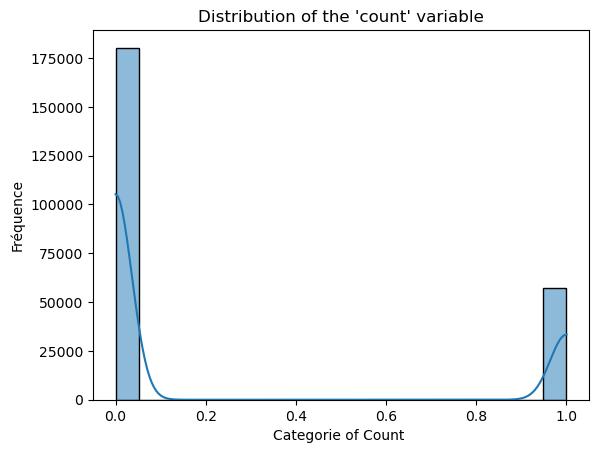

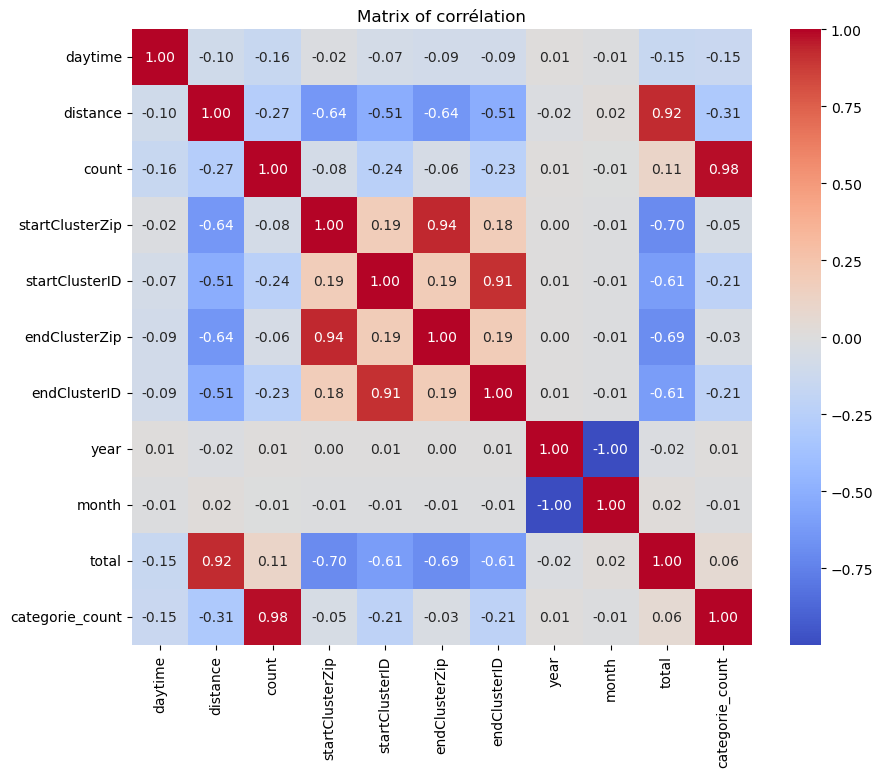

In [24]:

# Distribution of 'count'
sns.histplot(df['categorie_count'], kde=True)
plt.title("Distribution of the 'count' variable")
plt.xlabel("Categorie of Count ")
plt.ylabel("Fréquence")
plt.show()

# correlations matrix
dfCorr = df.corr(numeric_only= True)
correlation_matrix = dfCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrix of corrélation")
plt.show()


## 3 Data Reduction / Transformation & Cleansing

In view of the correlation of the data and the instructions given in the information review we need to keep collones that may be relevant to the models.


In [25]:
#Let's start by keeping only useful features
dfUtils = df.filter(['year', 'month', 'startClusterID','endClusterID', 'isHoliday', 'weekday', 'daytime', 'distance','count','total','categorie_count' ])
dfUtils

year  month  startClusterID   endClusterID     isHoliday weekday  \
0       2021      3   3254026000002  3254026000007  Keine Ferien      Di   
1       2021      3   3241013050002  3241013050008  Keine Ferien      Mi   
2       2021      3   3241013050007  3241013030001  Keine Ferien      Sa   
3       2021      3   3254028001012  3254028001004  Keine Ferien      Fr   
4       2021      3   3254028001003  3241013070001  Keine Ferien      Fr   
...      ...    ...             ...            ...           ...     ...   
237482  2020     10   3241013050001  3241013080001  Keine Ferien      So   
237483  2020     10   3254028001012  3254028001003        Ferien      Mo   
237484  2020     10   3254028001013  3254028003001  Keine Ferien      Di   
237485  2020     10   3254026000014  3254026000003  Keine Ferien      Mo   
237486  2020     10   3254028004001  3254028001013        Ferien      Mi   

        daytime  distance  count  total  categorie_count  
0             7         3     15     45                1  
1            17         0     10      0                0  
2            11         3     10     30                0  
3            13         0     15      0                1  
4            18         7     10     70                0  
...         ...       ...    ...    ...              ...  
237482       17         5      5     25                0  
237483        9         0     15      0                1  
237484        9         2     10     20                0  
237485       18         5      5     25                0  
237486       12         2     15     30                1  

[237487 rows x 11 columns]

In [26]:
# Look the null values
print(dfUtils.isnull().sum())

year               0
month              0
startClusterID     0
endClusterID       0
isHoliday          0
weekday            0
daytime            0
distance           0
count              0
total              0
categorie_count    0
dtype: int64


In [27]:
# Dictionnaire des valeurs uniques
unique_values = {col: dfUtils[col].unique() for col in dfUtils.columns}

# Afficher le dictionnaire ou accéder à une colonne spécifique
print(unique_values)

{'year': array([2021, 2020]), 'month': array([ 3,  2,  1, 12, 11, 10]), 'startClusterID': array([3254026000002, 3241013050002, 3241013050007, 3254028001012,
       3254028001003, 3254026000001, 3254026000004, 3254026000015,
       3254028001002, 3241013050009, 3241013050001, 3254028002001,
       3254026000014, 3254026000006, 3254026000010, 3254026000008,
       3254028001013, 3254026000007, 3254026000005, 3241013080001,
       3254028001018, 3254028001006, 3254028001001, 3241013070001,
       3241013050008, 3254028007001, 3241013020002, 3254026000012,
       3254028001019, 3254028001009, 3254028001004, 3241013060001,
       3241013050006, 3254028001017, 3241013020001, 3254028001005,
       3254026000016, 3254028001015, 3254028001008, 3254028003001,
       3254026000009, 3241013010001, 3254026000013, 3254028004001,
       3254026000003, 3241013040001, 3241013030001, 3254028001014,
       3254028005001, 3254028006001]), 'endClusterID': array([3254026000007, 3241013050008, 3241013030001,

In [28]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

dfPrepared = dfUtils.copy()
#We're using a list here to be able to standardize it so that 
#if we need more collones in the future, we just need to add the collone to the list. 
columns_to_encode = ['weekday', 'isHoliday']

for col in columns_to_encode:
    dfPrepared[col] = labelenc.fit_transform(dfPrepared[col])
#Let's save the data we've prepared for the models so that we can save it and return to the current state.
dfPrepared.to_csv('prepared_data2.csv', index=False)

dfPrepared

year  month  startClusterID   endClusterID  isHoliday  weekday  \
0       2021      3   3254026000002  3254026000007          1        0   
1       2021      3   3241013050002  3241013050008          1        3   
2       2021      3   3241013050007  3241013030001          1        5   
3       2021      3   3254028001012  3254028001004          1        2   
4       2021      3   3254028001003  3241013070001          1        2   
...      ...    ...             ...            ...        ...      ...   
237482  2020     10   3241013050001  3241013080001          1        6   
237483  2020     10   3254028001012  3254028001003          0        4   
237484  2020     10   3254028001013  3254028003001          1        0   
237485  2020     10   3254026000014  3254026000003          1        4   
237486  2020     10   3254028004001  3254028001013          0        3   

        daytime  distance  count  total  categorie_count  
0             7         3     15     45                1  
1            17         0     10      0                0  
2            11         3     10     30                0  
3            13         0     15      0                1  
4            18         7     10     70                0  
...         ...       ...    ...    ...              ...  
237482       17         5      5     25                0  
237483        9         0     15      0                1  
237484        9         2     10     20                0  
237485       18         5      5     25                0  
237486       12         2     15     30                1  

[237487 rows x 11 columns]

## 4 Splitting into training & test data, stratify
The target attribute is separated from the data frame. Training and test data are split in a ratio of 70:30. Using the "stratify" option, the distribution of the target attribute is identical to that in the source data.

In [29]:
#import de train_test_split for split the data in train and test and stratify data 
from sklearn.model_selection import train_test_split

# Define target variable and predictors
y_classification = dfPrepared['categorie_count']
y_regression = dfPrepared['count']
X = dfPrepared.drop(['count'], axis=1).drop(['categorie_count'], axis=1)


# Data separation for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.3, random_state=101, stratify=y_classification)

# Data separation for regresions
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, random_state=101)


##  Decision Tree model
We'll use our decision tree for classification and we'll evaluate it and its ROC curve as well as its interpretation and metric values, then we'll see the regression. 

In [30]:
# import de DecisionTreeClassifier for our model and confusion_matrix and roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Train model for Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train_class, y_train_class)

# Prédictions
y_pred_class = dt_classifier.predict(X_test_class)



## Evaluation of the model
This is followed by the evaluation of the model on the test data.

In [31]:
from sklearn.metrics import classification_report

# Évaluation
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     54087
           1       0.94      0.88      0.91     17160

    accuracy                           0.96     71247
   macro avg       0.95      0.93      0.94     71247
weighted avg       0.96      0.96      0.96     71247

Confusion Matrix:
 [[53164   923]
 [ 2139 15021]]


The absolute distribution is shown in the form of a confusion matrix.

How would you rate the quality of the model?

#  ROC Curve for Classification

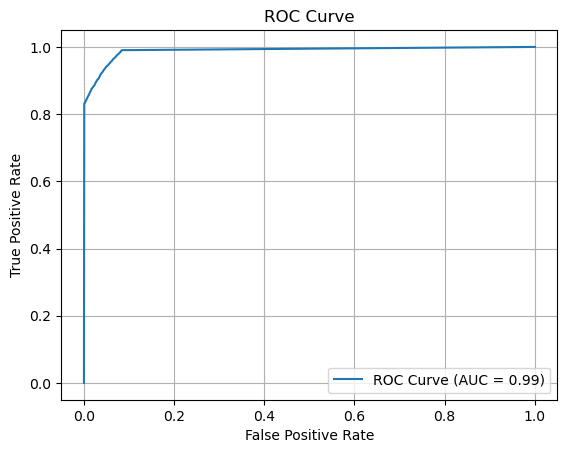

In [32]:
# Courbe ROC
from sklearn.preprocessing import label_binarize
# Get predicted probabilities for the positive class (class 1)
y_scores = dt_classifier.predict_proba(X_test_class)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_class, y_scores)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

## Interpretation

The decision tree classification model performs very well, with an overall precision of 96%, indicating that it correctly classifies the majority of examples. Recall is also high, particularly for classes 1 and 0 (98% and 88%). The F1 score, a good compromise between precision and recall, remains high for all classes, with values close to 1 for classes 1 and 0. In addition, the AUC rates of the ROC curve are remarkable, with values of 0.99 for classes 0 and 1, showing the model's excellent ability to discriminate between classes. The confusion matrix shows that the majority of errors concern confusion between classes 0 and 1, but these errors remain relatively low. In short, we have an almost perfect classification model with good metrics.

### This is the regression models for our data

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Modèle
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

# Prédictions
y_pred_reg = dt_regressor.predict(X_test_reg)

# Évaluation and metrics 
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 2.44
Mean Absolute Error: 0.43
R² Score: 0.85


## Interpretation

The regression model, using the Decision Tree Regressor, demonstrates moderate performance with an R² score of 0.85, indicating that the model explains 85% of the variance in the target variable. The Mean Squared Error (MSE) is 2.44, which reflects the average squared difference between the predicted and actual values, suggesting some error but not excessively large. The Mean Absolute Error (MAE) is 0.43, which indicates that, on average, the model's predictions are off by0.43 units from the actual values. While the model is providing reasonable predictions, the relatively moderate R² score suggests that there is room for improvement, potentially through tuning the model or incorporating additional features.

# REFLEXION

One of the difficulties encountered during this process was understanding the trade-off between model complexity and performance. Initially, I expected the decision tree model for regression to perform well.  What's more, in terms of feature engineering and data pre-processing, while some features were straightforward, others required further thought and processing, such as coding categorical variables or dealing with outliers.

There were alternatives for each stage of the modeling process, including trying out other algorithms such as random forests or growth gradient machines, which often outperform decision trees in terms of generalization. However, using a decision tree gave valuable insight into the interpretability of the model and provided a good baseline. I learned that while complex models can improve accuracy, it's essential to strike a balance with the risks of overfitting and model simplicity. In addition, experimenting with different metrics (such as MAE, MSE and R²) helped me better understand model behavior and its strengths and weaknesses in real-world applications.